# Machine Learning Project - Hair Loss Image Classification
Dataset : https://www.kaggle.com/datasets/sithukaungset/hairlossdataset

In [1]:
import numpy as np
import os
import tensorflow as tf
import cv2
import imghdr
from matplotlib import pyplot as plt

In [2]:
data_dir = 'D:\College\Semester 4\Machine Learning\Project\Hair Loss\data0330' 

## Data Cleaning

In [3]:
# read data
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1092 files belonging to 2 classes.


In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

In [5]:
#re-read data after cleaning, and resize all pictures to the same height and width
batch_size = 32
img_height = 256
img_width = 256

data = tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height, img_width),batch_size=batch_size)

Found 1092 files belonging to 2 classes.


In [6]:
# normalize image rpg values

image_batch, labels_batch = next(iter(data))
first_image = image_batch[0]
print("before normalization: ", np.min(first_image), np.max(first_image))

before normalization:  0.3384781 254.41562


In [7]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = data.map(lambda x, y: (normalization_layer(x), y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [8]:
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print("after normalization: ", np.min(first_image), np.max(first_image))

after normalization:  0.0 0.920893


# Load Data

In [9]:
data_iterator = data.as_numpy_iterator()

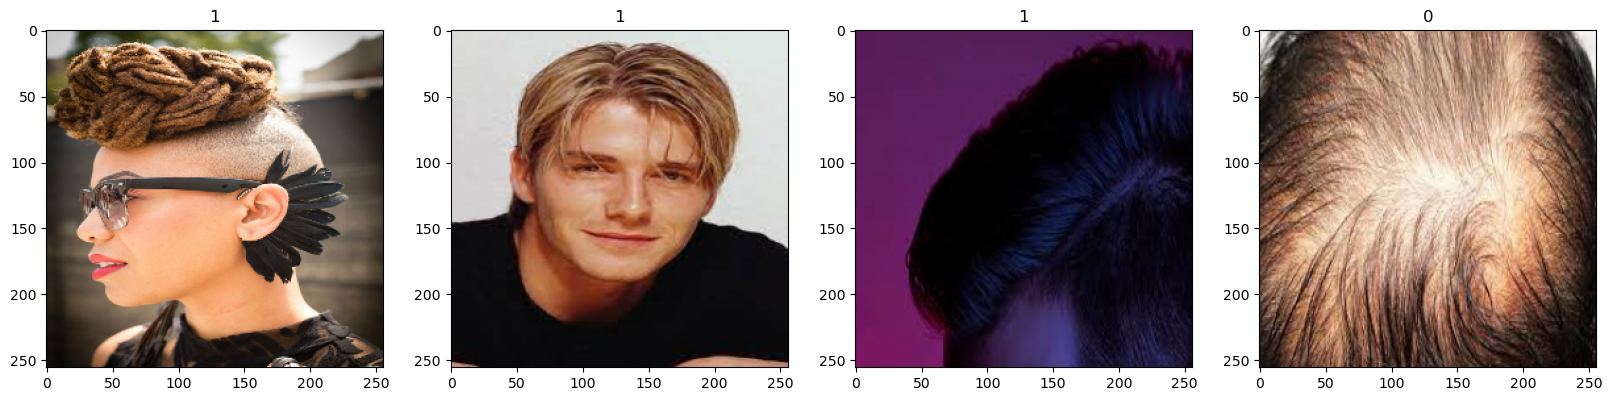

In [10]:
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [11]:
data = data.map(lambda x,y: (x/255, y))

In [12]:
data.as_numpy_iterator().next()

(array([[[[0.6269441 , 0.67773306, 0.68302566],
          [0.6414137 , 0.6851637 , 0.69237304],
          [0.632878  , 0.6642068 , 0.6832512 ],
          ...,
          [0.74234396, 0.817611  , 0.8419293 ],
          [0.7333909 , 0.8172621 , 0.8428998 ],
          [0.7344293 , 0.807254  , 0.8397602 ]],
 
         [[0.63853204, 0.68224376, 0.6898954 ],
          [0.6372679 , 0.67686653, 0.681092  ],
          [0.8087495 , 0.8438445 , 0.84115165],
          ...,
          [0.72759104, 0.82463676, 0.84062076],
          [0.7293547 , 0.81587774, 0.8404046 ],
          [0.7252394 , 0.81361824, 0.8317286 ]],
 
         [[0.6388032 , 0.68321407, 0.6902081 ],
          [0.63228077, 0.67637   , 0.6766413 ],
          [0.80811435, 0.8464886 , 0.8480032 ],
          ...,
          [0.73818594, 0.8251861 , 0.84456074],
          [0.7399117 , 0.8189054 , 0.84437484],
          [0.7316603 , 0.80460656, 0.8401731 ]],
 
         ...,
 
         [[0.15686275, 0.18431373, 0.22352941],
          [0.15686

# Splitting the Data

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [14]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Building Deep learning model (CNN)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [16]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [18]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/25
24/24 [==============================] - 30s 1s/step - loss: 0.8213 - accuracy: 0.5521 - val_loss: 0.6736 - val_accuracy: 0.5179
Epoch 2/25
24/24 [==============================] - 23s 895ms/step - loss: 0.6220 - accuracy: 0.6536 - val_loss: 0.5284 - val_accuracy: 0.7679
Epoch 3/25
24/24 [==============================] - 21s 825ms/step - loss: 0.4712 - accuracy: 0.7943 - val_loss: 0.5244 - val_accuracy: 0.7455
Epoch 4/25
24/24 [==============================] - 21s 821ms/step - loss: 0.4140 - accuracy: 0.8359 - val_loss: 0.4316 - val_accuracy: 0.8125
Epoch 5/25
24/24 [==============================] - 20s 793ms/step - loss: 0.3784 - accuracy: 0.8346 - val_loss: 0.3507 - val_accuracy: 0.8750
Epoch 6/25
24/24 [==============================] - 20s 774ms/step - loss: 0.2482 - accuracy: 0.9062 - val_loss: 0.2694 - val_accuracy: 0.8839
Epoch 7/25
24/24 [==============================] - 20s 778ms/step - loss: 0.1638 - accuracy: 0.9466 - val_loss: 0.2672 - val_accuracy: 0.8929
Ep

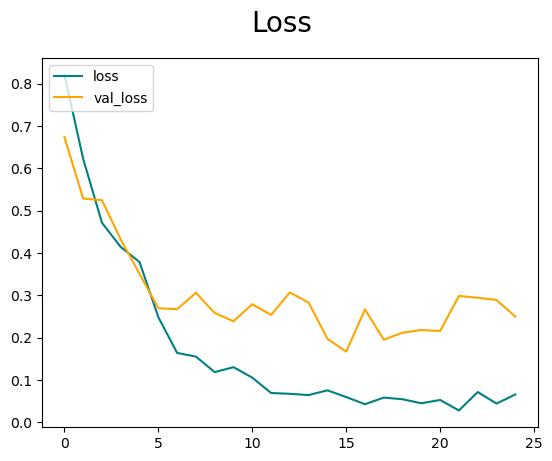

In [19]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

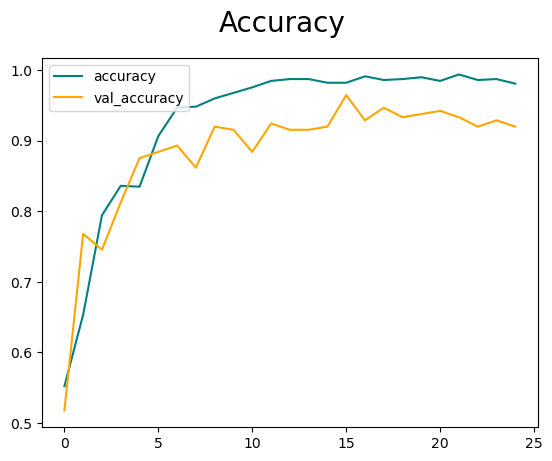

In [20]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluation

In [21]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy #,F1Score

In [22]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
# f_score = F1Score()

In [23]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 120ms/step


In [24]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9130435, shape=(), dtype=float32) tf.Tensor(0.93333334, shape=(), dtype=float32) tf.Tensor(0.9270833, shape=(), dtype=float32)


In [25]:
# Calculating Evaluation with Sklearn library
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
# Get the true and predicted labels for the test set
y_true = []
y_pred = []
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred_batch = model.predict(X)
    y_pred_batch = np.round(y_pred_batch).astype(int)
    y_true.extend(y)
    y_pred.extend(y_pred_batch)

# Compute the accuracy, precision, recall, and F1-score metrics
acc = accuracy_score(y_true, y_pred)
pre = precision_score(y_true, y_pred)
re = recall_score(y_true, y_pred)
f_score = f1_score(y_true, y_pred)

# Print the computed metrics
print("Accuracy:", acc)
print("Precision:", pre)
print("Recall:", re)
print("F1-score:", f_score)

1/1 [==============================] - 0s 120ms/step
Accuracy: 0.9375
Precision: 0.9534883720930233
Recall: 0.9111111111111111
F1-score: 0.9318181818181819


1/1 [==============================] - 0s 122ms/step


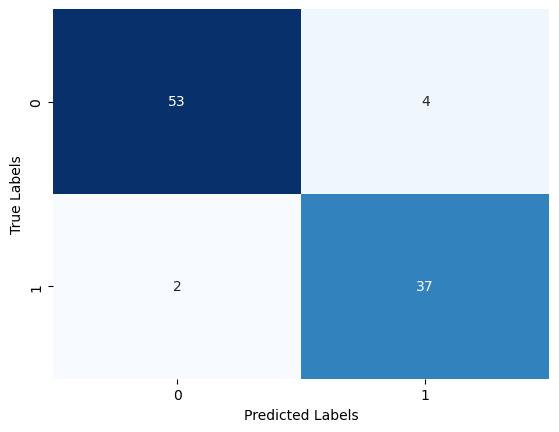

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the true and predicted labels for the test set
y_true = []
y_pred = []
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred_batch = model.predict(X)
    y_pred_batch = np.round(y_pred_batch).astype(int)
    y_true.extend(y)
    y_pred.extend(y_pred_batch)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Testing and Predicting

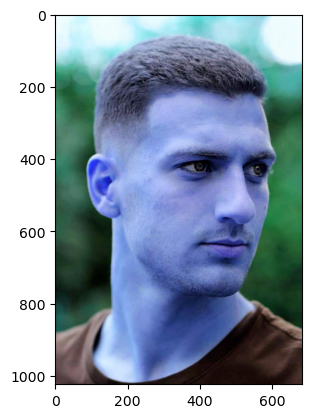

In [28]:
# Test 1
img = cv2.imread("D:\College\Semester 4\Machine Learning\Project\haircuts-for-men-with-thick-hair-short-faded-sides-683x1024.jpg")
plt.imshow(img)
plt.show()
#cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

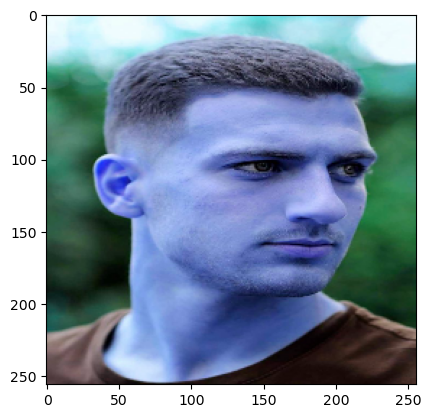

In [29]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [30]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 67ms/step


array([[0.03130459]], dtype=float32)

In [32]:
if yhat > 0.5: 
    print(f'Predicted class is Bald')
else:
    print(f'Predicted class is Not Bald')

Predicted class is Not Bald


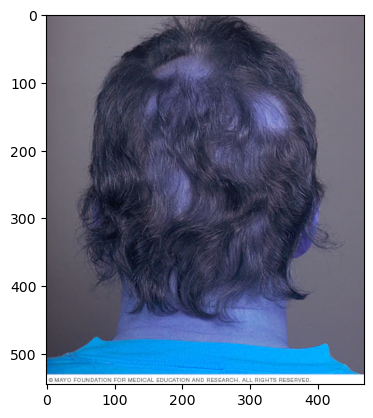

In [33]:
# Test 2

img2 = cv2.imread("D:\College\Semester 4\Machine Learning\Project\hairloss.jpg")
plt.imshow(img2)
plt.show()

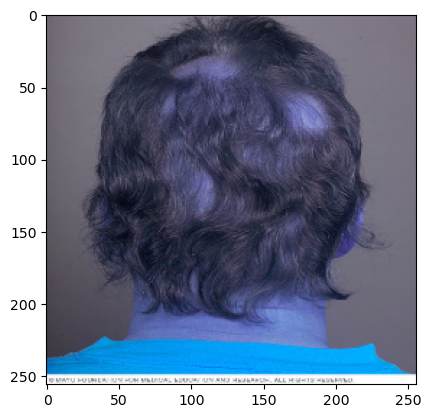

In [34]:
resize = tf.image.resize(img2, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [35]:
yhat2 = model.predict(np.expand_dims(resize/255, 0))
yhat2

1/1 [==============================] - 0s 22ms/step


array([[0.02943925]], dtype=float32)

In [36]:
if yhat2 > 0.5: 
    print(f'Predicted class is Bald')
else:
    print(f'Predicted class is Not Bald')

Predicted class is Not Bald


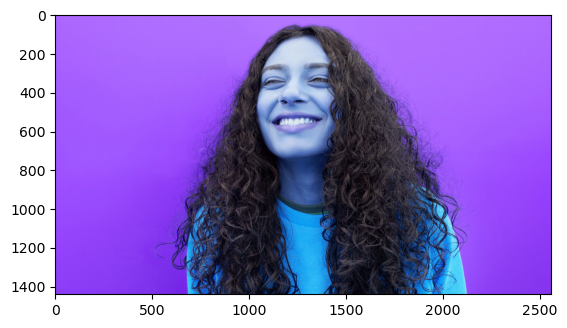

In [37]:
# Test 3

img4 = cv2.imread("D:\College\Semester 4\Machine Learning\Project\curlyhair.jpg")
plt.imshow(img4)
plt.show()

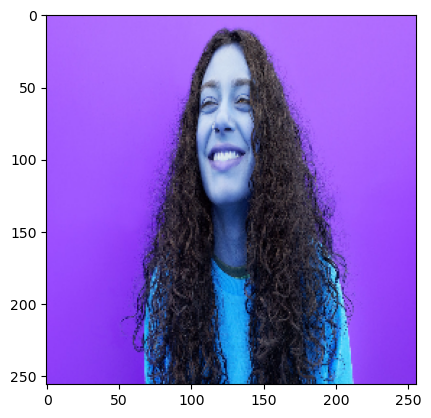

In [38]:
resize = tf.image.resize(img4, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [39]:
yhat4 = model.predict(np.expand_dims(resize/255, 0))
yhat4

1/1 [==============================] - 0s 12ms/step


array([[0.00481896]], dtype=float32)

In [40]:
if yhat4 > 0.5: 
    print(f'Predicted class is Bald')
else:
    print(f'Predicted class is Not Bald')

Predicted class is Not Bald


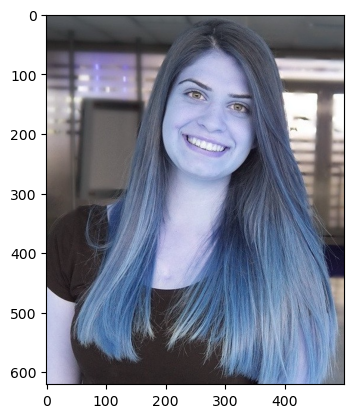

In [41]:
# Test 4

img5 = cv2.imread("D:\College\Semester 4\Machine Learning\Project\long-thick-hair.jpg")
plt.imshow(img5)
plt.show()

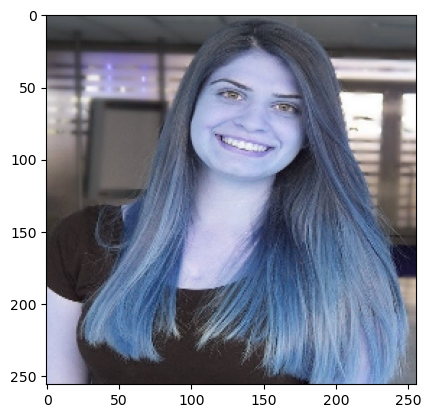

In [42]:
resize = tf.image.resize(img5, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [43]:
yhat5 = model.predict(np.expand_dims(resize/255, 0))
yhat5

1/1 [==============================] - 0s 11ms/step


array([[0.00031469]], dtype=float32)

In [44]:
if yhat5 > 0.5: 
    print(f'Predicted class is Bald')
else:
    print(f'Predicted class is Not Bald')

Predicted class is Not Bald


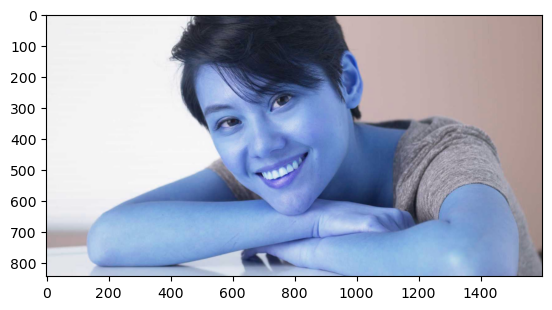

In [45]:
# Test 5

img6 = cv2.imread("D:\College\Semester 4\Machine Learning\Project\AdobeStock_70640659.jpg")
plt.imshow(img6)
plt.show()

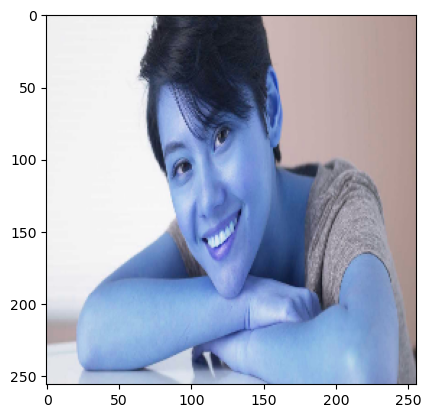

In [46]:
resize = tf.image.resize(img6, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [47]:
yhat6 = model.predict(np.expand_dims(resize/255, 0))
print(yhat6)
if yhat6 > 0.5: 
    print(f'Predicted class is Bald')
else:
    print(f'Predicted class is Not Bald')

1/1 [==============================] - 0s 22ms/step
[[0.03863054]]
Predicted class is Not Bald
